In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Занятие №14, Модуль№2. Анализ данных

### Практическое задание
● Получите из seaborn датасет ирисов.

● Проанализируйте данные с помощью группировки и получите статистику с помощью pandas.

● Постройте графики по этим данным с помощью seaborn.
 

In [2]:
# Импортируем библиотеке для анализа и работы с данными
import numpy as np
import pandas as pd

# импортируем  библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,versicolor
35,5.0,3.2,1.2,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica
140,6.7,3.1,5.6,2.4,virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Мы вводим количество уникальных объектов species
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.shape

(150, 5)

In [9]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

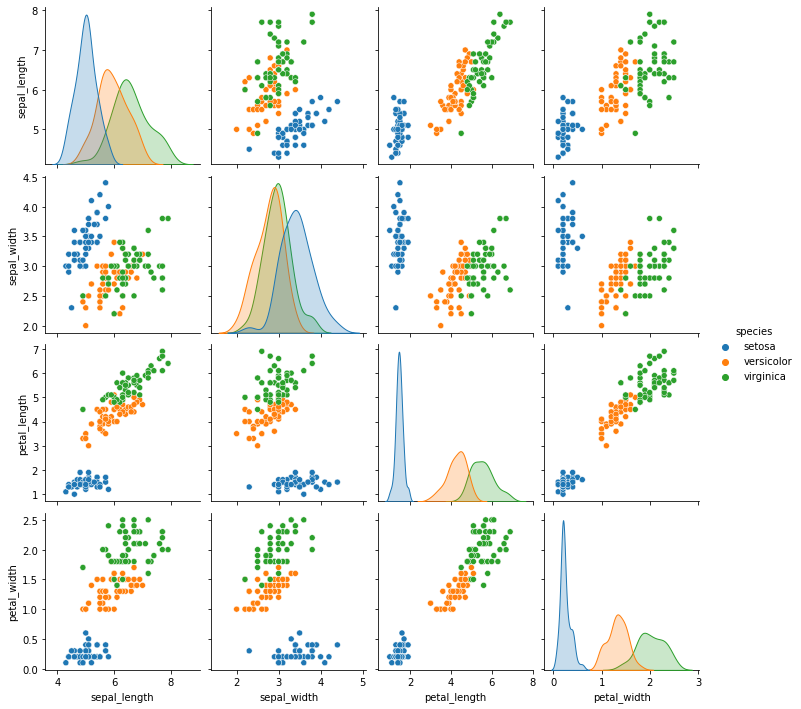

In [10]:
sns.pairplot(iris, hue='species');

Процент ширины бутона цветов вида Сетоза: 37.37 %
Процент ширины бутона цветов вида Разноцветный: 30.2 %
Процент ширины бутона цветов вида Вергиника: 32.42 %


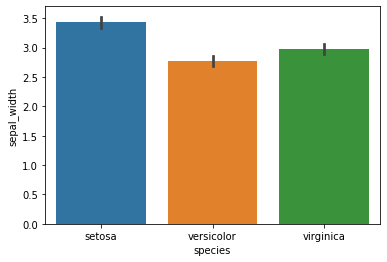

In [11]:
# Визуализируем зависимость ширины бутона от вида цветка
sns.barplot(x='species', y='sepal_width', data=iris)

print("Процент ширины бутона цветов вида Сетоза:", round((iris["sepal_width"][iris["species"] == 'setosa'].sum() / iris["sepal_width"].sum() * 100), 2), "%")
print("Процент ширины бутона цветов вида Разноцветный:", round((iris["sepal_width"][iris["species"] == 'versicolor'].sum() / iris["sepal_width"].sum() * 100), 2), "%")            
print("Процент ширины бутона цветов вида Вергиника:", round((iris["sepal_width"][iris["species"] == 'virginica'].sum() / iris["sepal_width"].sum() * 100), 2), "%")       

Процент длины бутона цветов вида Сетоза: 28.56 %
Процент длины бутона цветов вида Разноцветный: 33.86 %
Процент длины бутона цветов вида Вергиника: 37.58 %


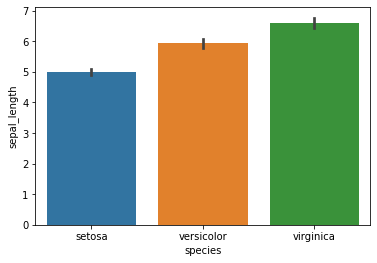

In [12]:
# Визуализируем зависимость длины бутона от вида цветка
sns.barplot(x='species', y='sepal_length', data=iris)

print("Процент длины бутона цветов вида Сетоза:", round((iris["sepal_length"][iris["species"] == 'setosa'].sum() / iris["sepal_length"].sum() * 100), 2), "%")
print("Процент длины бутона цветов вида Разноцветный:", round((iris["sepal_length"][iris["species"] == 'versicolor'].sum() / iris["sepal_length"].sum() * 100), 2), "%")            
print("Процент длины бутона цветов вида Вергиника:", round((iris["sepal_length"][iris["species"] == 'virginica'].sum() / iris["sepal_length"].sum() * 100), 2), "%")       

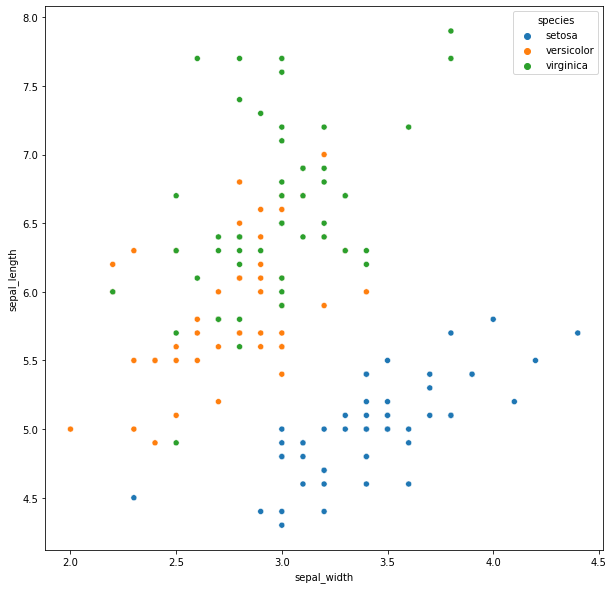

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species');

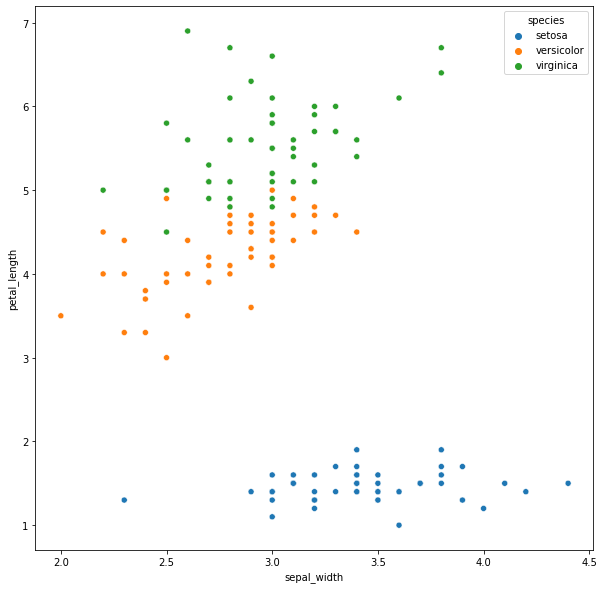

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=iris, x='sepal_width', y='petal_length', hue='species');

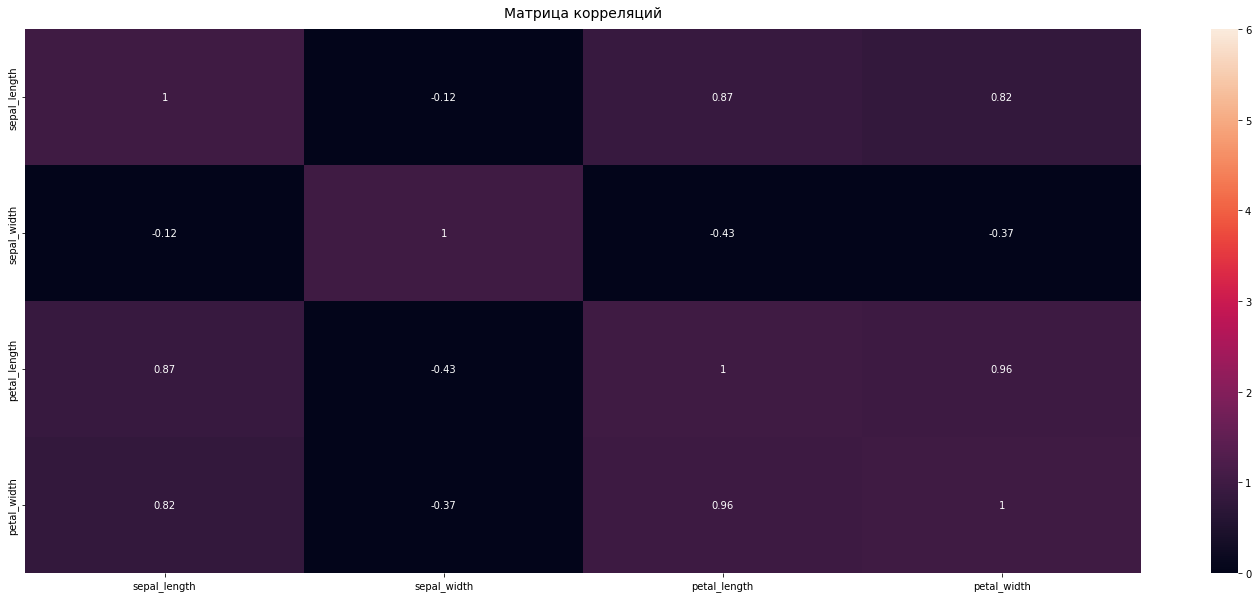

In [15]:
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(iris.corr(), vmin=0, vmax=6, annot=True)
heatmap.set_title('Матрица корреляций', fontdict={'fontsize':14}, pad=12 );

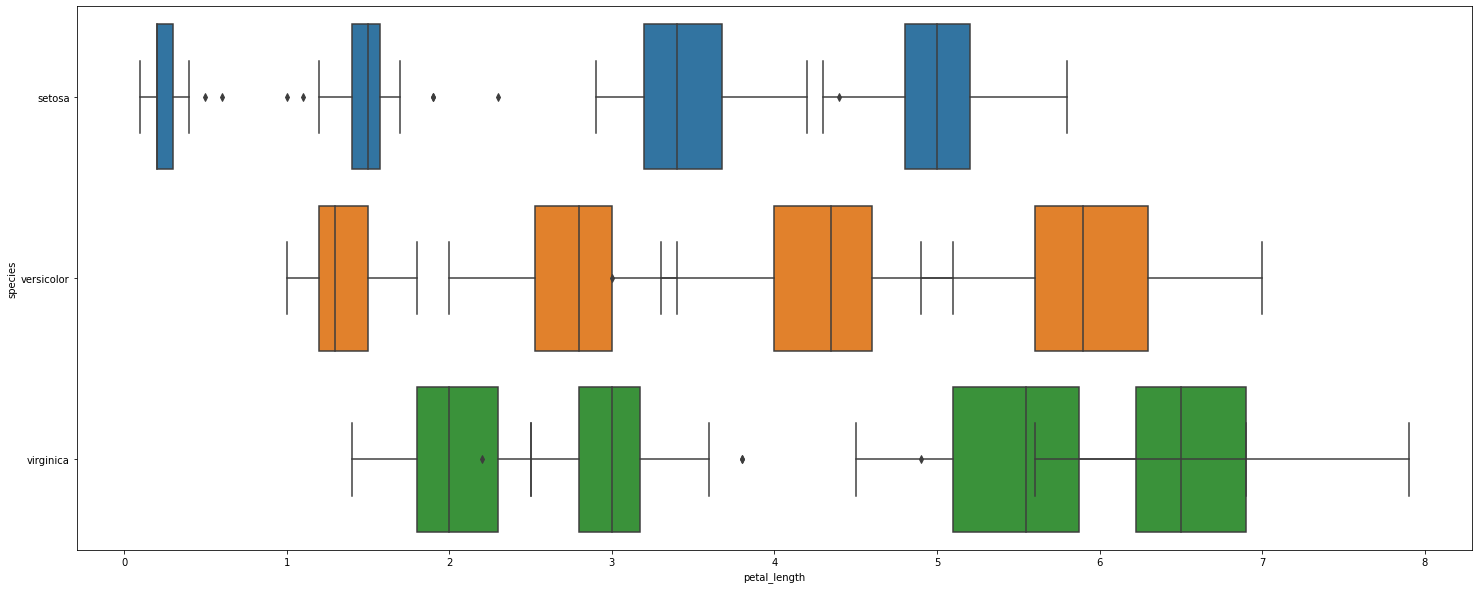

In [16]:
plt.figure(figsize=(25,10))
sns.boxplot(data=iris, x="sepal_width", y="species")
sns.boxplot(data=iris, x="sepal_length", y="species")
sns.boxplot(data=iris, x="petal_width", y="species")
sns.boxplot(data=iris, x="petal_length", y="species");

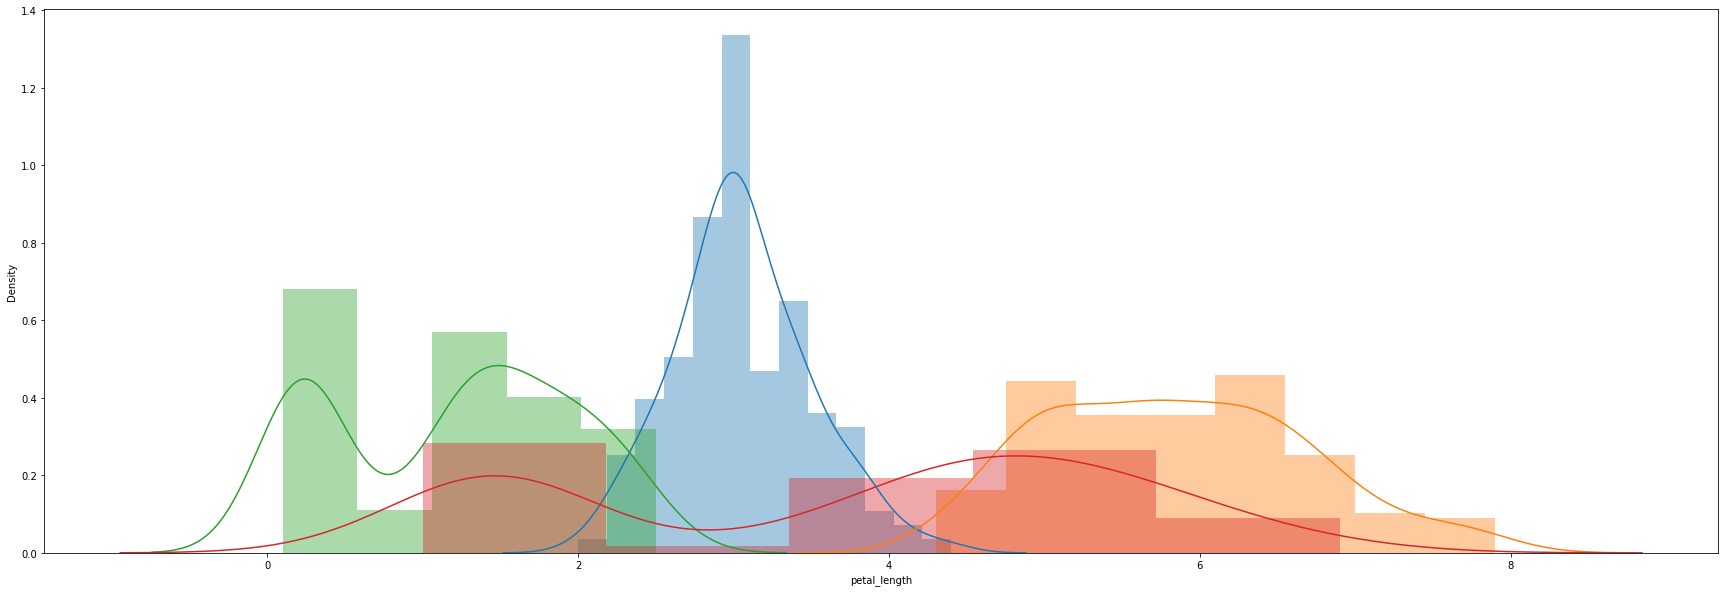

In [17]:
plt.figure(figsize=(30,10))
sns.distplot(iris['sepal_width'])
sns.distplot(iris['sepal_length'])
sns.distplot(iris['petal_width'])
sns.distplot(iris['petal_length']);